# Avocado Price Prediction - Ganesh Ram Gururajan

## Importing,Data Cleaning and Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/ganes\Data Science/Datasets/avocado.csv')

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


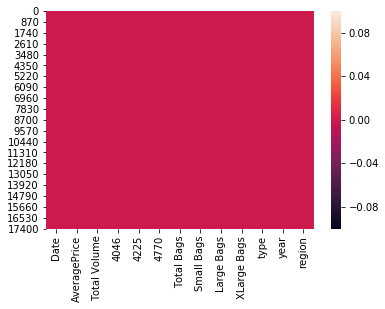

In [6]:
sns.heatmap(data.isnull())

In [7]:
data.shape

(18249, 13)

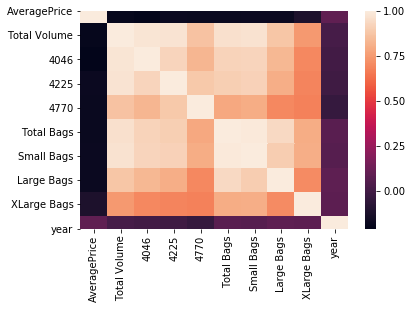

In [8]:
sns.heatmap(data.corr())

In [9]:
data.drop(['4046','4225','Total Bags','Small Bags'],axis=1,inplace = True)

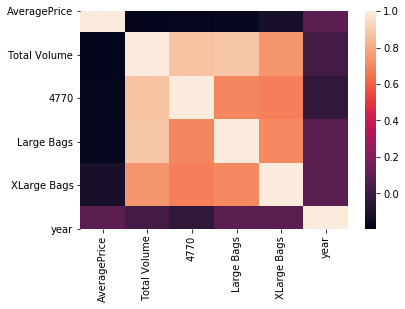

In [10]:
sns.heatmap(data.corr())

In [11]:
data.drop(['4770','Large Bags'],axis=1,inplace = True)

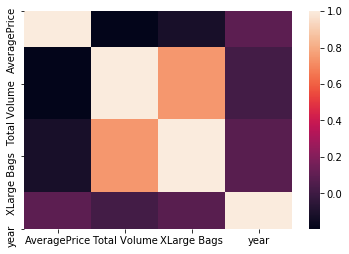

In [12]:
sns.heatmap(data.corr())

In [13]:
data.head()

,Date,AveragePrice,Total Volume,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,0.0,conventional,2015,Albany


In [14]:
def get_month(col):
    
    col = col.split('-')
    return col[1]

def get_day(col):
    col = col.split('-')
    return col[2]

def get_year(col):
    col = col.split('-')
    return col[0]

In [15]:
data['month'] = data['Date'].apply(get_month)

In [16]:
data['day'] = data['Date'].apply(get_day)

In [17]:
data['year'] = data['Date'].apply(get_year)

In [18]:
data.head()

,Date,AveragePrice,Total Volume,XLarge Bags,type,year,region,month,day
0,2015-12-27,1.33,64236.62,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,0.0,conventional,2015,Albany,12,06
4,2015-11-29,1.28,51039.60,0.0,conventional,2015,Albany,11,29


In [19]:
data = data.drop(['Date'],axis=1)

In [20]:
data.columns

Index(['AveragePrice', 'Total Volume', 'XLarge Bags', 'type', 'year', 'region',
       'month', 'day'],
      dtype='object')

In [21]:
data.head()

,AveragePrice,Total Volume,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,0.0,conventional,2015,Albany,12,06
4,1.28,51039.60,0.0,conventional,2015,Albany,11,29


In [22]:
data['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [23]:
data['region'].value_counts().index

Index(['Syracuse', 'Louisville', 'Detroit', 'SouthCarolina', 'Orlando', 'West',
       'Plains', 'PhoenixTucson', 'Boise', 'LasVegas', 'Boston', 'Northeast',
       'HarrisburgScranton', 'Albany', 'Sacramento', 'LosAngeles', 'Spokane',
       'CincinnatiDayton', 'RaleighGreensboro', 'SanFrancisco', 'Tampa',
       'Houston', 'TotalUS', 'Midsouth', 'Philadelphia', 'Columbus', 'Denver',
       'Jacksonville', 'MiamiFtLauderdale', 'California', 'NewYork',
       'BuffaloRochester', 'StLouis', 'Seattle', 'Indianapolis',
       'SouthCentral', 'SanDiego', 'Southeast', 'NewOrleansMobile',
       'RichmondNorfolk', 'Pittsburgh', 'HartfordSpringfield', 'GrandRapids',
       'Charlotte', 'Roanoke', 'Chicago', 'Atlanta', 'Portland', 'Nashville',
       'GreatLakes', 'BaltimoreWashington', 'NorthernNewEngland',
       'DallasFtWorth', 'WestTexNewMexico'],
      dtype='object')

In [24]:
def conv_dummy(col):
    if col == 'conventional':
        return 0
    else:
        return 1

In [25]:
data['type'] = data['type'].apply(conv_dummy)

In [26]:
data['type'].value_counts()

0    9126
1    9123
Name: type, dtype: int64

In [27]:
region_list = list(data['region'].value_counts().index)

In [28]:
type(region_list)

list

In [29]:
def region_dummy(col):
    return region_list.index(col)

In [30]:
data['region'] = data['region'].apply(region_dummy)

In [31]:
data.head()

,AveragePrice,Total Volume,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,0.0,0,2015,13,12,27
1,1.35,54876.98,0.0,0,2015,13,12,20
2,0.93,118220.22,0.0,0,2015,13,12,13
3,1.08,78992.15,0.0,0,2015,13,12,06
4,1.28,51039.60,0.0,0,2015,13,11,29


In [32]:
data.dtypes

AveragePrice    float64
Total Volume    float64
XLarge Bags     float64
type              int64
year             object
region            int64
month            object
day              object
dtype: object

In [33]:
data['year'] = data['year'].astype(float)
data['month'] = data['month'].astype(float)
data['day'] = data['day'].astype(float)

## Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = data.drop(['AveragePrice'],axis=1)

In [36]:
y = data['AveragePrice']

In [37]:
X.shape,y.shape

((18249, 7), (18249,))

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [39]:
X_train.shape,y_train.shape

((12774, 7), (12774,))

In [40]:
X_test.shape,y_test.shape

((5475, 7), (5475,))

## Machine Learning

## Decision Tree Regression

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
dt = DecisionTreeRegressor()

In [43]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [44]:
pred1 = dt.predict(X_test)

## Decision Tree Evaluation

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [46]:
print(mean_absolute_error(y_test,pred1))

0.13763470319634702


In [47]:
print(mean_squared_error(y_test,pred1))

0.04646778082191781


In [48]:
print(r2_score(y_test,pred1))

0.7146488112666658


## Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr = LinearRegression()

In [51]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
pred2 = lr.predict(X_test)

## Linear Regression Evaluation

In [53]:
print(mean_absolute_error(y_test,pred2))

0.2373562089832779


In [54]:
print(mean_squared_error(y_test,pred2))

0.09501740993638409


In [55]:
print(r2_score(y_test,pred2))

0.41651332609107583


## Random Forest Regression

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
rf = RandomForestRegressor()

In [58]:
rf.fit(X_train,y_train)

C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [59]:
pred3= rf.predict(X_test)

## Random Forest Evaluation - Best Model

In [60]:
print(mean_absolute_error(y_test,pred3))

0.11548913242009132


In [61]:
print(mean_squared_error(y_test,pred3))

0.027728484931506845


In [62]:
print(r2_score(y_test,pred3))

0.8297238216022629


## XGBoost

In [63]:
from xgboost import XGBRegressor

In [64]:
xg = XGBRegressor()

In [65]:
xg.fit(X_train,y_train)

C:\Users\ganes\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:48:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [66]:
pred4 = xg.predict(X_test)

## XGBoost Evaluation

In [67]:
print(mean_absolute_error(y_test,pred4))

0.1688750174452725


In [68]:
print(mean_squared_error(y_test,pred4))

0.05366410573310281


In [69]:
print(r2_score(y_test,pred4))

0.6704573342562258


## AdaBoost

In [70]:
from sklearn.ensemble import AdaBoostRegressor

In [71]:
ada = AdaBoostRegressor()

In [72]:
ada.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [73]:
pred5 = ada.predict(X_test)

## AdaBoost Evaluation

In [74]:
print(mean_absolute_error(y_test,pred5))

0.23091295536296383


In [75]:
print(mean_squared_error(y_test,pred5))

0.08507547119941081


In [76]:
print(r2_score(y_test,pred5))

0.4775651772173768


# END